In [1]:
import pandas as pd
from trop_fns import *
from WDDD_class import *
from experiments import *
import seaborn as sns

# Shift Experiment

In [2]:
shift_descent_DF = pd.read_pickle("shift_descent_DF.pkl")

In [3]:
log_error_shift_descent_DF = log_error(shift_descent_DF)
display(shift_descent_DF.groupby(['lr', 'N', 'M', 'grad'])['log_error'].agg([('mean', 'mean')])['mean'].str[-1].unstack(level=0).style.highlight_min(color = 'lightgreen', axis = 1))
# print(shift_descent_DF.groupby(['lr', 'N', 'M', 'grad'])['log_error'].agg([('mean', 'mean')])['mean'].str[-1].unstack(level=0).to_latex(float_format="%.3f"))
print("Total experiment time is: ", sum(shift_descent_DF['time_taken'])/60, " minutes." )
print("Average experiment time is: ", np.mean(shift_descent_DF['time_taken']), " seconds." )

Total experiment time is:  1477.314916117986  minutes.
Average experiment time is:  5.1295656809652295  seconds.


In [4]:
shift_optimization_DF = pd.read_pickle("shift_optimization_DF.pkl")

In [5]:
log_error_shift_optimization_DF = log_error(shift_optimization_DF)
display(shift_optimization_DF.groupby(['lr', 'N', 'M', 'grad'])['log_error'].agg([('mean', 'mean')])['mean'].str[-1].unstack(level=0).style.highlight_min(color = 'lightgreen', axis = 1))  
print("Total experiment time is: ", sum(shift_optimization_DF['time_taken'])/60, " minutes" )
print("Average experiment time is: ", np.mean(shift_optimization_DF['time_taken']), " seconds." )

Total experiment time is:  787.9160137931506  minutes
Average experiment time is:  2.7358194923373285  seconds.


# Supp Experiments

In [6]:
supp_descent_DF = pd.read_pickle("supp_descent_DF.pkl")

In [7]:
log_error_supp_descent_DF = log_error(supp_descent_DF)
display(supp_descent_DF.groupby(['scale', 'N', 'M', 'graph'])['log_error'].agg([('mean', 'mean')])['mean'].str[-1].unstack(level=0).style.highlight_min(color = 'lightgreen', axis = 1))
# print(supp_descent_DF.groupby(['scale', 'N', 'M', 'graph'])['log_error'].agg([('mean', 'mean')])['mean'].str[-1].unstack(level=0).to_latex(float_format="%.3f"))
print("Total experiment time is: ", sum(supp_descent_DF['time_taken'])/60, " minutes" )
print("Average experiment time is: ", np.mean(supp_descent_DF['time_taken']), " seconds." )

Total experiment time is:  893.2681815306346  minutes
Average experiment time is:  5.514001120559473  seconds.


In [8]:
trained_scale_df = pd.DataFrame(supp_descent_DF[supp_descent_DF["graph"] == "incomp"].groupby(['scale',
                                 'N', 'M', 
                                 ])['log_error'].agg([('mean', 'mean')])['mean'].str[-1].unstack(level=[1,2]).idxmin(), columns = ["scale"])

trained_scale_df.reset_index(inplace=True)

trained_scale_df.to_pickle("trained_scale_df.pkl")

In [9]:
trained_scale_df = pd.read_pickle("trained_scale_df.pkl")

# Sim Data Distances

In [10]:
sim_comp_DF = pd.read_pickle("sim_comp_DF.pkl")

Average time taken: 7.459953748296808  seconds


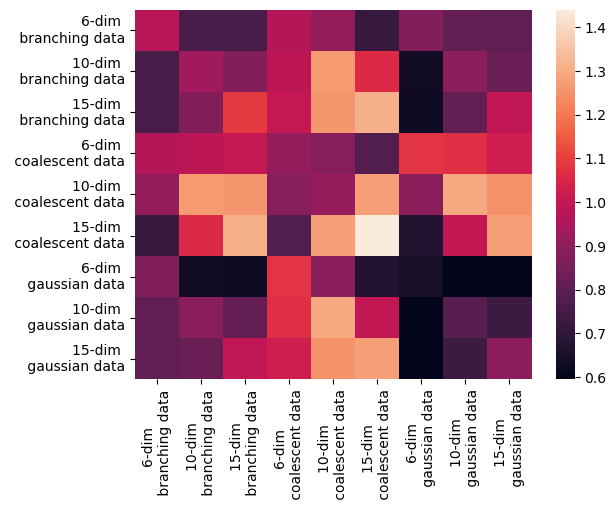

In [11]:
dataset_list = [[6, 'branching'], [10, 'branching'], [15, 'branching'],[6, 'coalescent'],[10, 'coalescent'],[15, 'coalescent']
                ,[6, 'gaussian'],[10, 'gaussian'],[15, 'gaussian']
               ]
M = np.zeros((len(dataset_list),len(dataset_list)))

for i in range(len(dataset_list)):
    for j in range(len(dataset_list)):
        
        N_i = dataset_list[i][0]
        type_i = dataset_list[i][1]
        N_j = dataset_list[j][0]
        type_j = dataset_list[j][1]
        
        if N_j <= N_i:
            dist = min(sim_comp_DF[(sim_comp_DF["N"] == N_i) & (sim_comp_DF["N_data_type"] == type_i) & (sim_comp_DF["M"] == N_j) & (sim_comp_DF["M_data_type"] == type_j)]['loss'])

            M[i,j] = dist
            M[j,i] = dist
    
axes_labels = [f"{dataset[0]}-dim \n {dataset[1]} data" for dataset in dataset_list]

fig = sns.heatmap(M, xticklabels = axes_labels, yticklabels = axes_labels)

fig.figure.savefig("Figures/sim_data_heatmap.png", bbox_inches = 'tight')

print("Average time taken:", np.mean(sim_comp_DF['time_taken']), " seconds")

# Real Data

In [12]:
real_data_DF = pd.read_pickle("real_data_DF.pkl")

Average time taken: 10.790516861176593  seconds


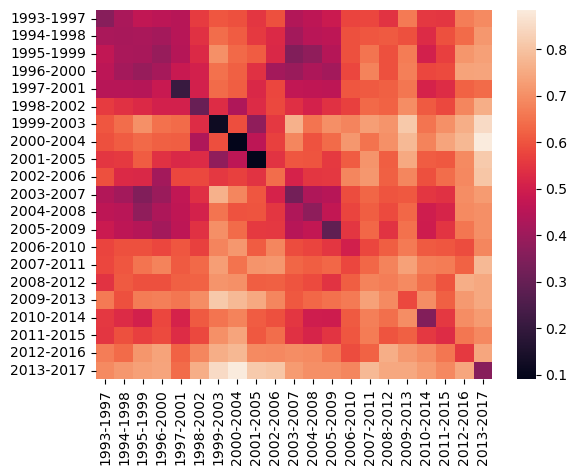

In [13]:
dataset_list = [str(n)+".npy" for n in range(1993, 2014)]
M = np.zeros((21,21))

for i in range(21):
    for j in range(i+1):
        
        dist = min(real_data_DF[(real_data_DF["high_datafile"] == dataset_list[j]) & (real_data_DF["low_datafile"] == dataset_list[i])]['loss'])

        M[i,j] = dist
        M[j,i] = dist

axes_labels = [str(n)+"-"+str(n+4) for n in range(1993, 2014)]

fig = sns.heatmap(M, xticklabels=axes_labels, yticklabels=axes_labels)

fig.figure.savefig("Figures/real_data_heatmap.png", bbox_inches = 'tight')

print("Average time taken:", np.mean(real_data_DF['time_taken']), " seconds")